In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv("Emotion_classify_Data.csv")
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [13]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [19]:
import plotly.graph_objects as go

In [20]:
z = df.groupby('Emotion', as_index=False)[['Comment']].count().rename({'Comment' : 'count'}, axis=1).sort_values(by='count',ascending=False)

In [21]:
fig = go.Figure(data=[go.Pie(labels=z['Emotion'],values=z['count'],hoverinfo='label+percent',  textinfo='percent+label',  hole=0.7,pull=[0.1, 0.1, 0.1, 0.1],  )])

In [24]:
fig.update_layout(title='<b>Percentual of each emotion</b>',title_x=0.5,template='seaborn',)
fig.show(renderer="browser")

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

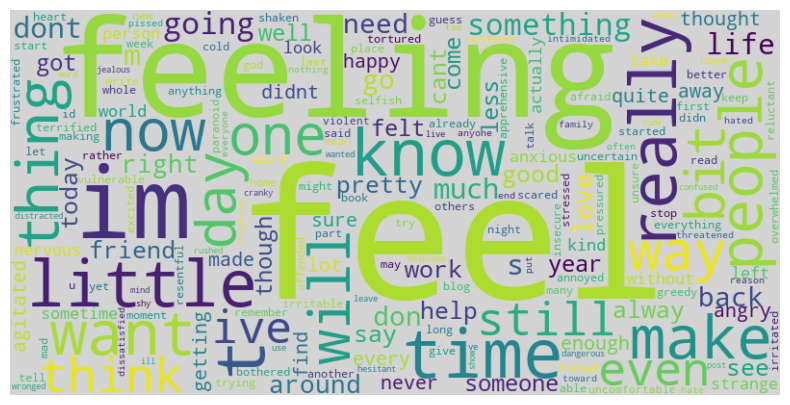

In [31]:
wordcloud = WordCloud(width=800, height=400, background_color='lightgrey', collocations=False, colormap='viridis', contour_color='black'  ).generate(' '.join(df['Comment']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [43]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

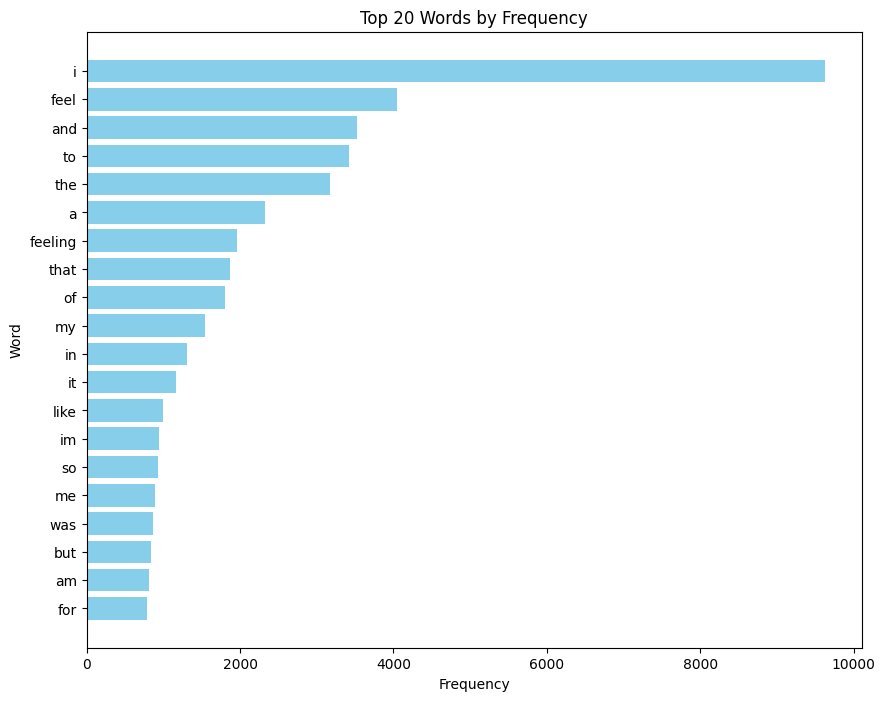

In [45]:
word_freq = Counter(' '.join(df['Comment']).split())
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count']).reset_index()
word_freq_df = word_freq_df.rename(columns={'index': 'word'})
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 8))
plt.barh(word_freq_df['word'][:20], word_freq_df['count'][:20], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Words by Frequency')
plt.gca().invert_yaxis()  
plt.show()

C:\Users\manik\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



             0         1         2         3         4         5         6  \
i    -0.387146  0.918591  0.230496  0.053225  0.405798 -1.548221  0.764497   
feel -0.457871  0.818902  0.310762  0.131080  0.558476 -1.458590  0.859395   
and  -0.328842  1.139291  0.200895  0.143822  0.466017 -1.578449  0.775123   
to   -0.411633  1.118409  0.300466  0.166379  0.475076 -1.551172  0.775611   
the  -0.359151  1.211142  0.215065  0.193573  0.417336 -1.541482  0.730076   

             7         8         9  ...        91        92        93  \
i     1.861380 -0.614755 -0.558735  ...  0.523390  0.306655 -0.004829   
feel  1.757509 -0.631283 -0.747933  ...  0.493762  0.334135  0.026574   
and   1.890652 -0.709383 -0.600909  ...  0.577921  0.222233  0.110450   
to    1.896262 -0.595326 -0.665497  ...  0.546848  0.288935  0.080450   
the   1.835122 -0.697259 -0.568318  ...  0.556223  0.170623  0.109100   

            94        95        96        97        98        99  cluster  
i     1.539901  

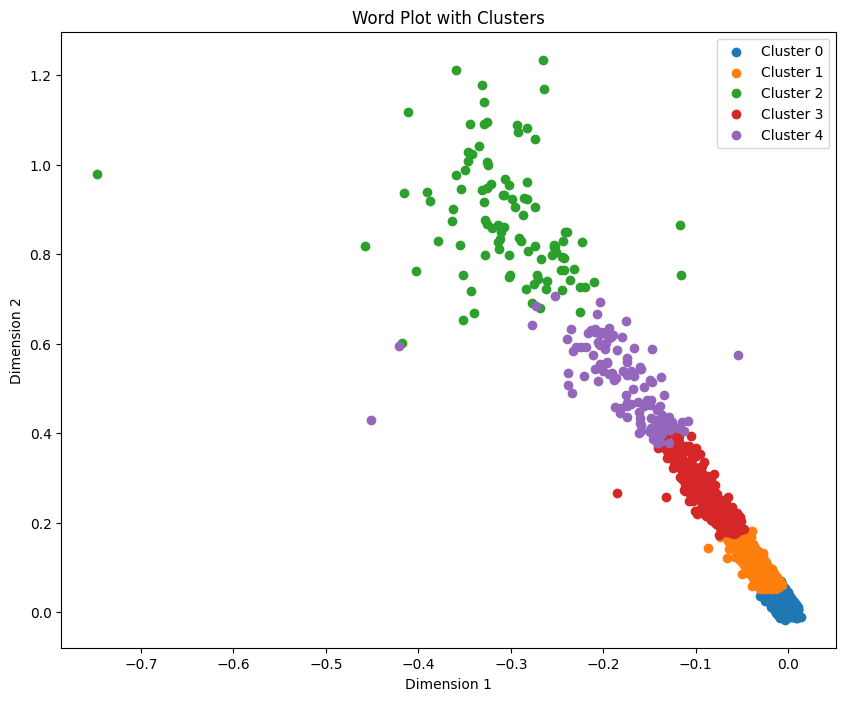

In [79]:
import numpy as np
from sklearn.cluster import KMeans
word_vectors = np.array(word_vector_df)
k = 5  
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(word_vectors)
word_vector_df['cluster'] = kmeans.labels_
print(word_vector_df.head())
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
for cluster in range(k):
    cluster_words = word_vector_df[word_vector_df['cluster'] == cluster]
    plt.scatter(cluster_words[0], cluster_words[1], label=f'Cluster {cluster}')
plt.title('Word Plot with Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


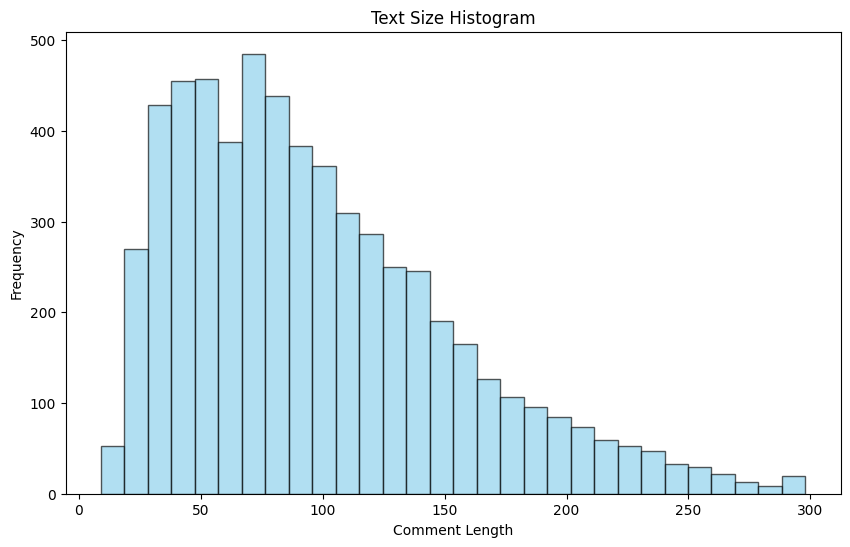

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Comment_Length'], bins=30, edgecolor='k', alpha=0.65, color='skyblue')
plt.title('Text Size Histogram')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()


In [84]:
import re

In [85]:
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

 
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)


def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)


def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 


def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute


def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

In [90]:
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", 
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", 
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", 
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", 
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", 
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once"
])


df['clean_text'] = df['Comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))


In [92]:
X = df['clean_text']
y = pd.factorize(df['Emotion'])

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
vect = TfidfVectorizer()
X =  vect.fit_transform(X)

In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
smote = SMOTE()
x,y = smote.fit_resample(X, y[0])

In [101]:
from sklearn.model_selection import train_test_split

In [103]:
X = df['Comment']
y = df['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_tfidf = tfidf_vectorizer.fit_transform(df['Comment'])
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Emotion'], test_size=0.2, random_state=42)
svm_model = SVC()
svm_model.fit(X_train, y_train)
accuracy = svm_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9166666666666666


In [114]:
RFC_model = RandomForestClassifier()

RFC_model.fit(X_train, y_train)

RandomForestClassifier()

In [115]:
SVM_model = svm.SVC()

SVM_model.fit(X_train, y_train)

SVC()

In [116]:
from sklearn.metrics import accuracy_score

In [120]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [122]:
acc = accuracy_score(y_test, y_pred)
acc

0.9166666666666666

In [123]:
y_pred = RFC_model.predict(X_test)

In [124]:
print(accuracy_score(y_test, y_pred))

0.9225589225589226


In [125]:
y_pred = SVM_model.predict(X_test)

In [126]:
print(accuracy_score(y_test, y_pred))

0.9166666666666666
